### Test and find the best Model


K-Means Cluster Centers:
[[-0.46528158 -0.22913219 -0.48506878 -0.46017817 -0.33698586 -0.54167022
  -0.58348398 -0.59081657 -0.33044035 -0.17410864 -0.40610396 -0.02880428
  -0.41196112 -0.37605872 -0.03811366 -0.36173664 -0.32659818 -0.396698
  -0.09232869 -0.23523586 -0.50383462 -0.24916291 -0.52257079 -0.48620178
  -0.33373666 -0.50822975 -0.54425486 -0.58513965 -0.3213992  -0.35982936]
 [ 0.89178969  0.43917003  0.92971515  0.88200816  0.64588956  1.03820125
   1.1183443   1.13239843  0.63334401  0.33370822  0.77836593  0.0552082
   0.78959215  0.72077921  0.07305119  0.69332857  0.62597984  0.76033783
   0.17696332  0.45086872  0.96568302  0.47756225  1.00159402  0.93188674
   0.63966193  0.97410703  1.04315516  1.12151767  0.61601513  0.68967294]]
K-Means Predicted Clusters:
[0 1]

Top 3 Classification Models:
Random Forest: Accuracy = 0.96
Naive Bayes: Accuracy = 0.96
SVM: Accuracy = 0.96

Top 3 Regression Models:
Random Forest Regressor: R^2 = 0.86
Decision Tree Regressor: R^

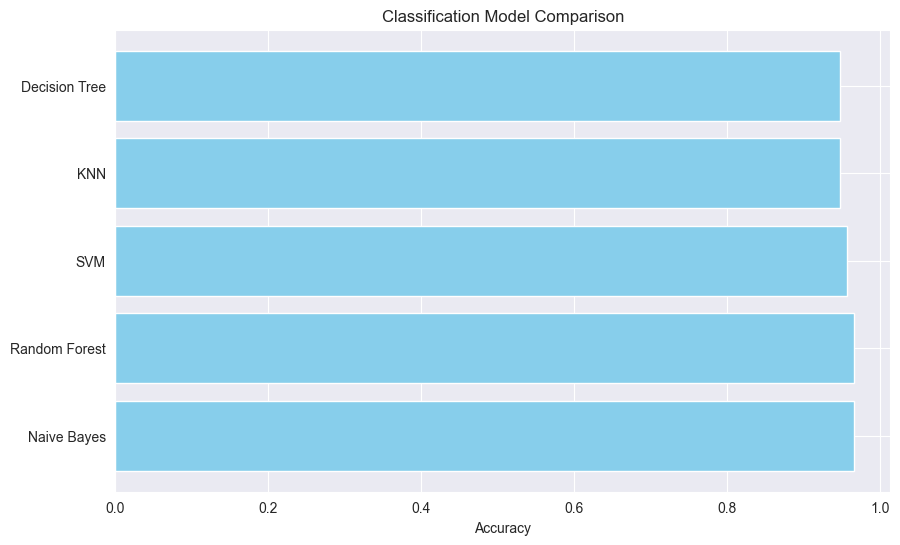

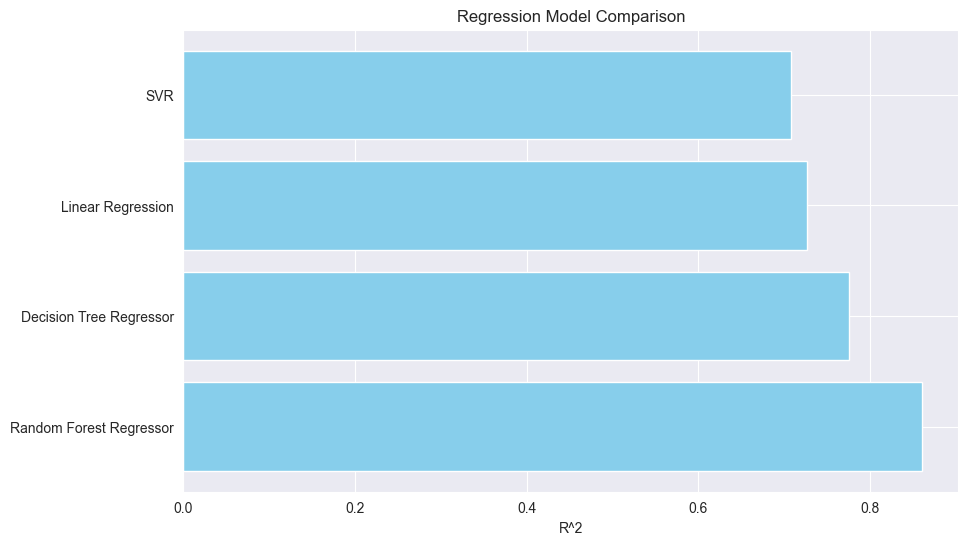

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, r2_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

# Load data from CSV
file_path = "cleaned_dataset.csv"  # Replace with the path to your CSV file
df = pd.read_csv(file_path)

# Rename columns if needed
df.rename(columns={"diagnosis": "target"}, inplace=True)  # Rename 'diagnosis' to 'target' for consistency

# Encode the target variable ('diagnosis') to numerical (0 and 1)
df['target'] = df['target'].map({'M': 0, 'B': 1})  # M: malignant, B: benign

# Feature and Target
X = df.drop('target', axis=1)
y = df['target']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for algorithms like SVM, KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define classifiers and regressors
classifiers = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB()
}

regressors = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "SVR": SVR(kernel='linear')
}

# Generic function to evaluate models
def evaluate_models(models, X_train, X_test, y_train, y_test, task="classification"):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        if task == "classification":
            results[name] = accuracy_score(y_test, predictions)
        elif task == "regression":
            results[name] = r2_score(y_test, predictions)
    return results

# Evaluate classifiers
classification_results = evaluate_models(classifiers, X_train_scaled, X_test_scaled, y_train, y_test, task="classification")

# Evaluate regressors
regression_results = evaluate_models(regressors, X_train_scaled, X_test_scaled, y_train, y_test, task="regression")

# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_scaled)
kmeans_pred = kmeans.predict(X_test_scaled)

# Map cluster labels to target classes
cluster_map = {0: "Cluster 0", 1: "Cluster 1"}
print(f"\nK-Means Cluster Centers:\n{kmeans.cluster_centers_}")
print(f"K-Means Predicted Clusters:\n{np.unique(kmeans_pred)}")

# Top models
top_classification = sorted(classification_results.items(), key=lambda x: x[1], reverse=True)[:3]
top_regression = sorted(regression_results.items(), key=lambda x: x[1], reverse=True)[:3]

# Display results
print("\nTop 3 Classification Models:")
for model, score in top_classification:
    print(f"{model}: Accuracy = {score:.2f}")

print("\nTop 3 Regression Models:")
for model, score in top_regression:
    print(f"{model}: R^2 = {score:.2f}")

# Plot results
def plot_results(results, title, metric):
    sorted_results = dict(sorted(results.items(), key=lambda item: item[1]))
    models = list(sorted_results.keys())
    scores = list(sorted_results.values())
    
    plt.figure(figsize=(10, 6))
    plt.barh(models, scores, color='skyblue')
    plt.xlabel(metric)
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

plot_results(classification_results, "Classification Model Comparison", "Accuracy")
plot_results(regression_results, "Regression Model Comparison", "R^2")
